<a href="https://colab.research.google.com/github/Dcodinginsane/Data-Analysis-project/blob/main/Social_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Social Network Analysis with NetworkX

In [3]:
import networkx as nx

# creatng an instance of graph
G = nx.Graph()

# Create an edge between two nodes . The nodes will be also created

G.add_edge('A' , 'B' , weight =6)



# generate random netwrok With numpy

In [5]:
import numpy as np
# Synthetic Directed Graph
Gd = nx.DiGraph()
for i in range(30):
   node_1 = np.random.randint(10)
   node_2 = np.random.randint(10)

   if node_1 != node_2:
    Gd.add_edge(node_1 , node_2)

# Synthetic Undirected Graph
G = nx.Graph()
for i in range(30):
  node_1 = np.random.randint(10)
  node_2 = np.random.randint(10)
  if node_1 != node_2:
    G.add_edge(node_1 , node_2)


to create a simple weighted network in NetworkX , we need to initialize an empty nx.Graph() object. The second step is to add edges with the add_edge() method and include the weight attribut

In [6]:
# Initialize the graph
G = nx.Graph()

# Add weighted edges

G.add_edge("A", "B", weight=0.6)
G.add_edge("A", "C", weight=0.2)
G.add_edge("C", "D", weight=0.1)
G.add_edge("C", "E", weight=0.7)
G.add_edge("C", "F", weight=0.9)
G.add_edge("A", "D", weight=0.3)


In Network signed graph are created as easily as wighted graphs

In [7]:
# Initialize the graph
G = nx.Graph()

# Add weighted edges
G.add_edge("A", "B", sign='+')
G.add_edge("A", "C", sign='-')
G.add_edge("C", "D", sign='-')
G.add_edge("C", "E", sign='+')
G.add_edge("C", "F", sign='-')
G.add_edge("A", "D", sign='+')

# Extracting information from Networks -
**PageRank Algorithm** - the core idea of the pageRank algorightm is the imporatnt nodes are the ones that have many incoming edges from other newtorks nodes especially from other important nodes
1. Assign an intital PageRank score to each node , equal to 1/N where N is the toal number of nodes in the newtwork
2. Apply the basic pageRank Upadate rule it states that each node provides tohis neighbous  nodes ana equal fration of its PageRank score
3. The new pageRank score of each node is update as the sum of valuest it receive from its neighbors

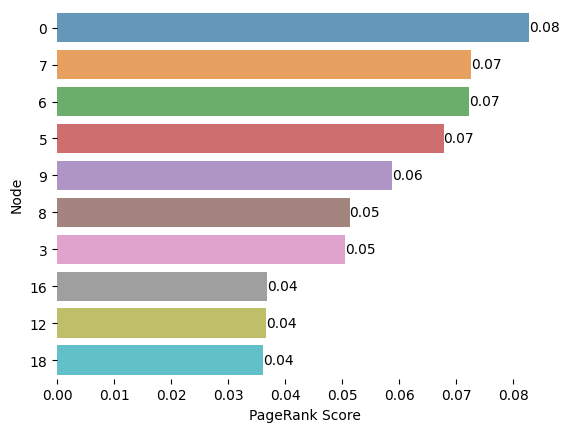

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate an artifical network of 25 nodes
G = nx.barabasi_albert_graph(25 , 4 , seed =42)

# Apply the PageRank algorithm and store the socres in a pd dataframe

pagerank_results = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)
pagerank_results = pd.Series(pagerank_results).sort_values(ascending=False)

# Plot the most importan node scores
fig, ax = plt.subplots()
sns.barplot(x=pagerank_results.iloc[:10].values, y=pagerank_results.iloc[:10].index.astype(str), orient='h', alpha=0.75)
ax.set_xlabel('PageRank Score')
ax.set_ylabel('Node')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')


# HITS Algorithm
the hits algorithm aims to identify two types of important nodes in a network z: huns and authorities
* Hubs are the nodes that point  to many other nodes
* Authorities are the nodes that are pointed to by many hubs

Differently than PageRank, with HITS we can not only measure the importance of each node in the network but also extrapolate insights about its role in the graph.

The steps followed by the HITS algorithm are

1. Assign to each node in the newtwork an Authority score and an Hub score equal to 1
2. Apply the Authority Update Rule to each node . The Authority score
of  a nodes is the sum of the Hub score of the nodes pointing it
3. Apply the Hub Update Rule to each node the hub  score of a node is the sum of the Authority socre of the nodes it is pointing at

Thanks to the Network library we can compare the Hits result with o the ones provided by NetworkX


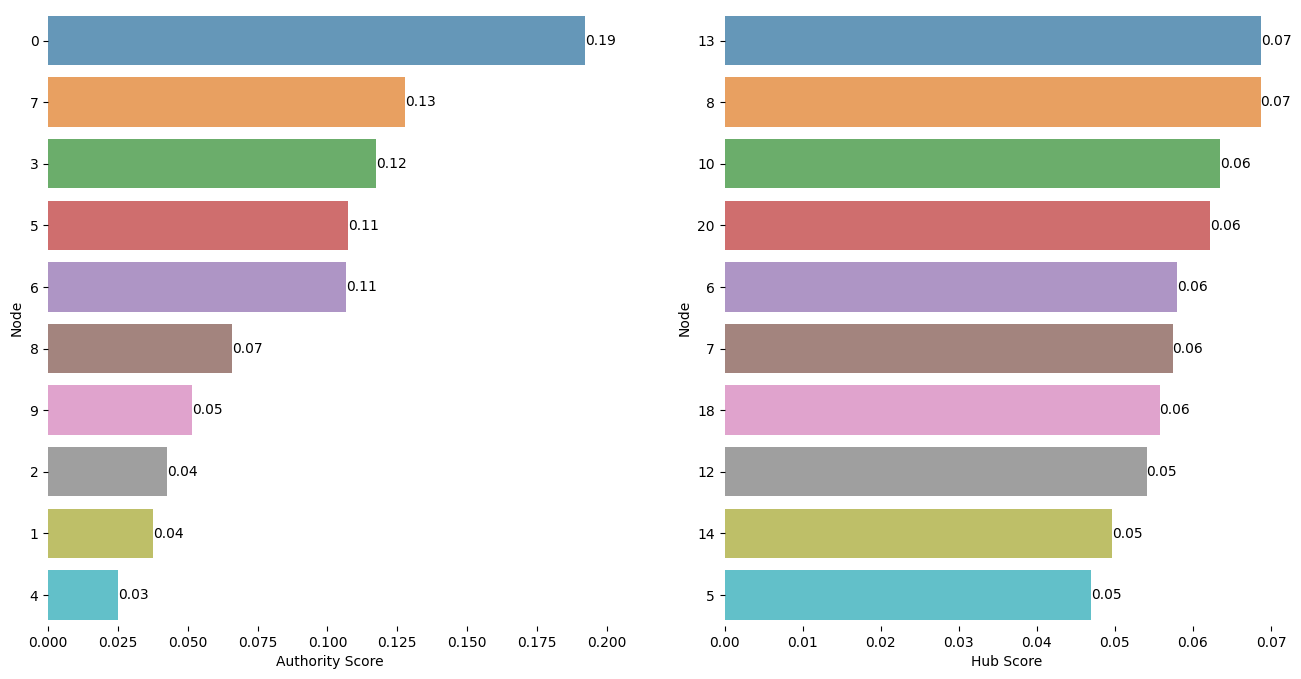

In [10]:
# Convert the previously create graph to directed
G_dir = G.to_directed()
for a, b in list(G.edges()):
    G_dir.remove_edge(a, b)

# Compute HITS scores
hits_results = nx.hits(G_dir, max_iter=100, tol=1e-06)
authority_results = pd.Series(hits_results[1]).sort_values(ascending=False)
hubs_results = pd.Series(hits_results[0]).sort_values(ascending=False)

# Plot the results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
sns.barplot(x=authority_results.iloc[:10].values, y=authority_results.iloc[:10].index.astype(str), orient='h', alpha=0.75, ax=ax1)
ax1.set_xlabel('Authority Score')
ax1.set_ylabel('Node')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
for i in ax1.containers:
    ax1.bar_label(i,fmt='%.2f')

sns.barplot(x=hubs_results.iloc[:10].values, y=hubs_results.iloc[:10].index.astype(str), orient='h', alpha=0.75, ax=ax2)
ax2.set_xlabel('Hub Score')
ax2.set_ylabel('Node')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
for i in ax2.containers:
    ax2.bar_label(i,fmt='%.2f')